<a href="https://colab.research.google.com/github/alik604/CMPT-419/blob/master/outdated_LSTM_with_WRDS_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working LSTM example and smaple code

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp '/content/drive/My Drive/CMPT 419 project/Data/tech1-agg.csv' tech1.csv
!cp '/content/drive/My Drive/CMPT 419 project/Data/tech2-agg.csv' tech2.csv


In [0]:
!ls

drive  sample_data  tech1.csv  tech2.csv


# start coding 

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline


import tensorflow as tf

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keras
from keras import regularizers
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.constraints import max_norm
from keras.layers import Dense, BatchNormalization
from keras.layers import GRU, LSTM, CuDNNGRU, CuDNNLSTM
from keras.layers import *
from keras.utils import to_categorical
from keras.preprocessing import sequence


import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
os.environ["CUDA_VISIBLE_DEVICES"]="3"

Using TensorFlow backend.


In [0]:
df1 = pd.read_csv('tech1.csv')
df2 = pd.read_csv('tech2.csv')

df = pd.concat([df1,df2])
df.tail()

,Unnamed: 0,DATE,SYM_ROOT,SIZE,PRICE
8196,140186193,2019-12-31 06:00:00,MSFT,77,157.50
8197,140186209,2019-12-31 07:00:00,MSFT,100,157.34
8198,140186493,2019-12-31 08:00:00,MSFT,2,157.16
8199,140201236,2019-12-31 09:00:00,MSFT,300,157.25
8200,140309303,2019-12-31 01:00:00,MSFT,200,157.85


In [0]:
df = df.drop(['Unnamed: 0'],axis=1)
df.index = df.DATE
df.tail()

,DATE,SYM_ROOT,SIZE,PRICE
DATE,,,,
2019-12-31 06:00:00,2019-12-31 06:00:00,MSFT,77,157.50
2019-12-31 07:00:00,2019-12-31 07:00:00,MSFT,100,157.34
2019-12-31 08:00:00,2019-12-31 08:00:00,MSFT,2,157.16
2019-12-31 09:00:00,2019-12-31 09:00:00,MSFT,300,157.25
2019-12-31 01:00:00,2019-12-31 01:00:00,MSFT,200,157.85


In [0]:
temp = df.SYM_ROOT.values
temp = set(temp)
print(temp)

{'AMZN', 'FNGU', 'MSFT', 'AAPL', 'GOOG'}


In [0]:
aapl = df[df.SYM_ROOT == 'AAPL']
aapl.drop(['SYM_ROOT','SIZE'],axis=1,inplace=True)
aapl_val = aapl.PRICE.values
train = aapl_val[:3000]
test = aapl_val[:635]

aapl_val

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array([169.18, 169.49, 169.67, ..., 290.3 , 292.16, 293.7 ])

In [0]:
len(aapl_val)

3635

In [0]:
len(train)

3000

In [0]:
len(test)

635

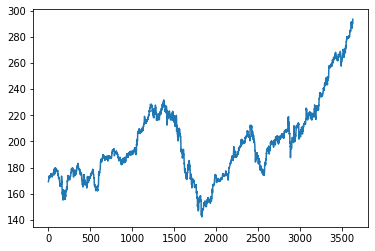

In [0]:
y = aapl.PRICE.values
x = np.arange(len(y))
plt.plot(x,y)

In [0]:
print('Are X and Y the same size?: ', len(y) == len(x))

Are X and Y the same size?:  True


In [0]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train.reshape(-1,1))




X_train = []
y_train = []

maxlen = 150
for i in range(maxlen,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-maxlen:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape


(2850, 150)

(2850, 150, 1)

In [0]:
# model = Sequential()
# model.add(GRU(150, input_shape=(maxlen, 1)))   # CuDNN
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse',metrics=['mean_squared_error'])

# model.summary()

model = Sequential()
model.add(LSTM(160, return_sequences=True))
model.add(LSTM(160, return_sequences=False)) # CuDNNGRU

model.add(Dense(160, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss='mean_squared_error', metrics =['mean_squared_error'])




In [0]:
model.fit(X_train, y_train, epochs = 30, batch_size = 150, validation_split=0.15)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 2422 samples, validate on 428 samples
Epoch 1/30





2422/2422 [==============================] - 51s 21ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 2/30
2422/2422 [==============================] - 49s 20ms/step - loss: 8.8354e-04 - mean_squared_error: 8.8354e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 3/30
2422/2422 [==============================] - 49s 20ms/step - loss: 7.9911e-04 - mean_squared_error: 7.9911e-04 - val_loss: 9.5494e-04 - val_mean_squared_error: 9.5494e-04
Epoch 4/30
2422/2422 [==============================] - 49s 20ms/step - loss: 6.3814e-04 - mean_squared_error: 6.3814e-04 - val_loss: 7.2909e-04 - val_mean_squared_error: 7.2909e-04
Epoch 5/30
2422/2422 [==============================] - 49s 20ms/step - loss: 7.6225e-04 - mean_squared_error: 7.6225e-04 - val_loss: 6.2375e-04 

KeyboardInterrupt: ignored

185.2 [204.59651]


<Figure size 1296x360 with 0 Axes>

Text(0.5, 1.0, 'Stock Price Prediction(GRU)')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Stock Price')

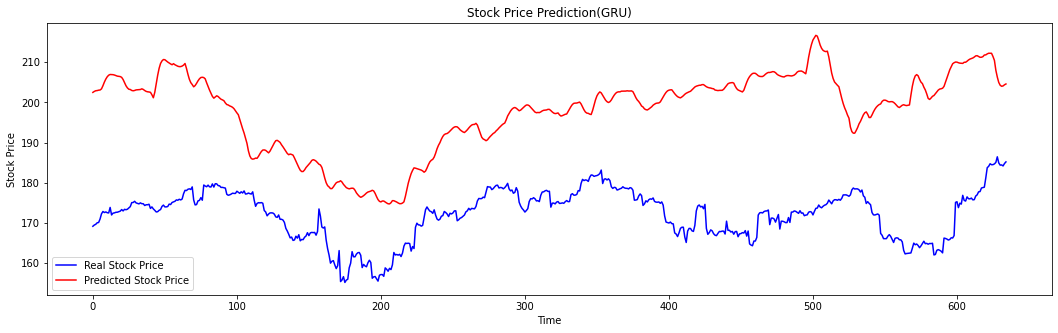

In [0]:
# testing the model
dataset_total = np.concatenate([test,train])
inputs = dataset_total[len(dataset_total)-len(test) - maxlen:]
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# Preparing X_test and predicting the prices
X_test = [inputs[i-maxlen:i] for i in range(maxlen,len(inputs))]

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price.reshape(-1,1))

####################################################
print(test[-1],predicted_stock_price[-1])
# Visualizing the results
plt.figure(figsize=(18,5))
plt.plot(test[:], color='b',label='Real Stock Price')
plt.plot(predicted_stock_price[:], color='r',label='Predicted Stock Price')
plt.title('Stock Price Prediction(GRU)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


## BUG??

In [0]:
all_data = np.concatenate([X_train,X_test],axis=0)
results = model.predict(all_data)

results = sc.inverse_transform(results.reshape(-1,1))
results = results.reshape(1,-1)[0]
output = np.concatenate([np.ones(maxlen)*200,results], axis=0)

In [0]:
all_data.reshape(1,-1)

array([[0.30090863, 0.30436479, 0.30637159, ..., 0.71453258, 0.71653938,
        0.70862478]])

<Figure size 1728x864 with 0 Axes>

KeyboardInterrupt: ignored

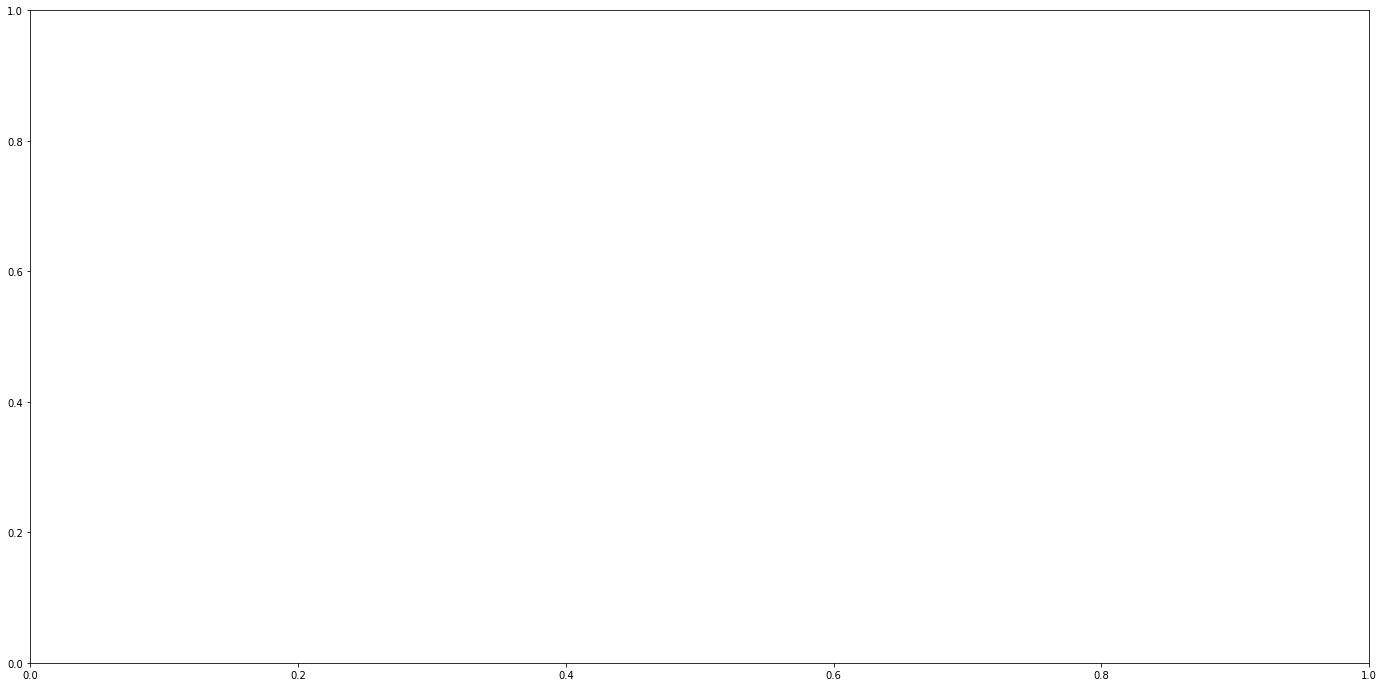

In [0]:
plt.figure(figsize = (24,12))


plt.plot(all_data.reshape(1,-1),color='b', label="y_train")
plt.plot(output,color='r', label="predict")
plt.axvline(len(X_train))
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [0]:
all_data.reshape(1,-1)

NameError: ignored

# benchmarking hyper-prams

In [0]:
RMSprop_low_LR = keras.optimizers.RMSprop(lr=0.0001)

model = Sequential()
model.add(CuDNNLSTM(160, return_sequences=True))
model.add(CuDNNLSTM(160, return_sequences=False))
model.add(Dense(160, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))

model.compile(optimizer = RMSprop_low_LR, loss='mean_squared_error', metrics =['mean_squared_error'])
c = model.fit(seqTrain, y_train, batch_size=64, epochs=30, validation_split=0.15)# .history

In [0]:
RMSprop_low_LR = keras.optimizers.RMSprop(lr=0.0001)

model = Sequential()
model.add(CuDNNLSTM(160, return_sequences=True))
model.add(CuDNNLSTM(160, return_sequences=False))

# model.add(GRU(150, input_shape=(seqTrain.shape[0],maxlen)))
model.add(Dense(160, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss='mean_absolute_error', metrics =['mean_squared_error'])
c = model.fit(seqTrain, y_train, batch_size=64, epochs=30, validation_split=0.15)# .history